#### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import random
import pickle as pkl
import bz2
import _pickle as cPickle


In [2]:
artist_data_path = "/home/suraj/ClickUp/Jan-Feb/Django Projects/DjangoProjects/Music_Recommendation_System/data/data/data_by_artist.csv"

In [3]:
music_data = pd.read_csv(artist_data_path)


In [4]:
music_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [5]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
music_data['popularity']

0        38.333333
1        30.576923
2        34.857143
3        34.851852
4        43.000000
           ...    
28675    35.000000
28676    48.000000
28677    23.000000
28678    35.000000
28679    31.000000
Name: popularity, Length: 28680, dtype: float64

array([[<AxesSubplot:title={'center':'popularity'}>]], dtype=object)

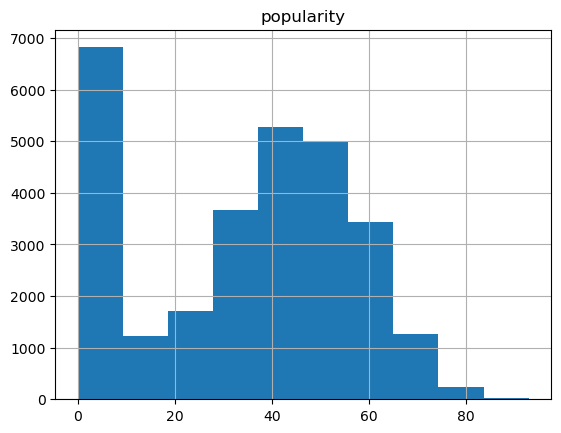

In [7]:
#plotting a histogram of data
music_data.hist(column='popularity')


In [8]:
# convert popularity metric into a custom rating
min_val = music_data['popularity'].min()
max_val = music_data['popularity'].max()

print("Minimum and Maximum values of popularity are {0} and {1}".format(min_val,max_val))


Minimum and Maximum values of popularity are 0.0 and 93.0


Assumption based on popularity index

0-20 - 1 star rating
20-40 - 2 star rating
40-60 - 3 star rating
60-80 - 4 star rating
80-100 - 5 star rating

In [9]:
conditions = [


    (music_data['popularity'] < 20),


    (music_data['popularity'] >= 20) & (music_data['popularity'] < 40),


    (music_data['popularity'] >= 40) & (music_data['popularity'] < 60),


    (music_data['popularity'] >= 60) & (music_data['popularity'] < 80),


    (music_data['popularity'] >= 90)


]

In [10]:
ratings = [1, 2, 3, 4, 5]



In [11]:
music_data['rating'] = np.select(conditions, ratings)



In [12]:
music_data['rating']

0        2
1        2
2        2
3        2
4        3
        ..
28675    2
28676    3
28677    2
28678    2
28679    2
Name: rating, Length: 28680, dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

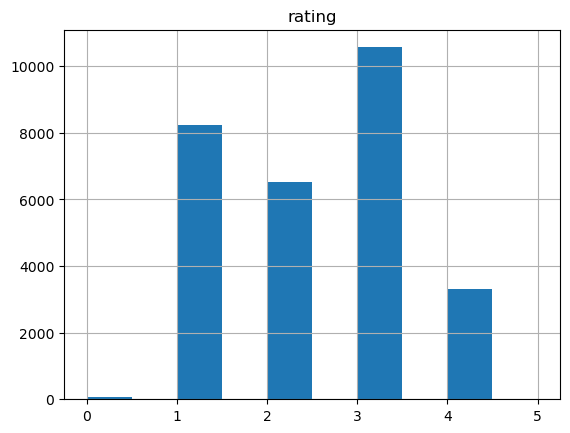

In [13]:
music_data.hist(column='rating')


In [14]:
# peeking into number of ratings of a user
music_data['rating'].value_counts()

3    10565
1     8228
2     6522
4     3302
0       60
5        3
Name: rating, dtype: int64

In [15]:
music_data

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,rating
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,2
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,2
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,2
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,2
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,2
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,3
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,2
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,2


In [16]:
rating_df = pd.DataFrame().assign(artist_name=music_data['artists'], rating = music_data['rating'])


In [17]:
# cleaned_df
rating_df

,artist_name,rating
0,"""Cats"" 1981 Original London Cast",2
1,"""Cats"" 1983 Broadway Cast",2
2,"""Fiddler On The Roof” Motion Picture Chorus",2
3,"""Fiddler On The Roof” Motion Picture Orchestra",2
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",3
...,...,...
28675,麥志誠,2
28676,黃品源,3
28677,黃國隆,2
28678,黑豹,2


In [18]:
#checking if there is a missing values
rating_df.isnull().sum()

artist_name    0
rating         0
dtype: int64

Creating 5 random users against each rating so as to be able to apply collaborative filtering technique i.e via user_id-rating

In [19]:
rating_df['user_id'] = [ random.randint(1,5)  for k in rating_df.index]


In [20]:
rating_df

,artist_name,rating,user_id
0,"""Cats"" 1981 Original London Cast",2,4
1,"""Cats"" 1983 Broadway Cast",2,4
2,"""Fiddler On The Roof” Motion Picture Chorus",2,2
3,"""Fiddler On The Roof” Motion Picture Orchestra",2,4
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",3,3
...,...,...,...
28675,麥志誠,2,2
28676,黃品源,3,1
28677,黃國隆,2,3
28678,黑豹,2,5


Making collaborative recommendation system based on ratings recieved for each user.
1. Each user will be a column with each artist being in the row. In each value(Row-column in the matrix), we will assign rating recieved by each user for each artist.
2. We'll only consider the users that have given most ratings to build our recommendation system. Ignoring the sparse ones but hopefully in this case, we won't have to eliminate users via any such threshold.
3. We'll only consider those artists that have recieved a rating. It can be set to a threshold too.

In [21]:
# keeping users that have atleast counted 1000 ratings
rating_df.groupby('user_id').count()['rating']

user_id
1    5711
2    5682
3    5787
4    5683
5    5817
Name: rating, dtype: int64

In [22]:
# optional,pruning - Since each of the user have more than 1000 ratings.

num = rating_df.groupby('user_id').count()['rating'] >1000
qualified_users = num.index

In [23]:
print(qualified_users)

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='user_id')


In [24]:
# filtering
pruned_df = rating_df[rating_df['user_id'].isin(qualified_users)]

In [25]:
pruned_df

,artist_name,rating,user_id
0,"""Cats"" 1981 Original London Cast",2,4
1,"""Cats"" 1983 Broadway Cast",2,4
2,"""Fiddler On The Roof” Motion Picture Chorus",2,2
3,"""Fiddler On The Roof” Motion Picture Orchestra",2,4
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",3,3
...,...,...,...
28675,麥志誠,2,2
28676,黃品源,3,1
28677,黃國隆,2,3
28678,黑豹,2,5


In [26]:
# step 2-
#filtering artists
#pruned_df.groupby('artist_name').count()['artist_name']>=1

In [27]:
#creating the matrix for collaborative filtering
final_table = pruned_df.pivot_table(index='artist_name', columns='user_id', values='rating')

In [28]:
final_table.fillna(0,inplace=True)

In [29]:
final_table

user_id,1,2,3,4,5
artist_name,,,,,
"""Cats"" 1981 Original London Cast",0.0,0.0,0.0,2.0,0.0
"""Cats"" 1983 Broadway Cast",0.0,0.0,0.0,2.0,0.0
"""Fiddler On The Roof” Motion Picture Chorus",0.0,2.0,0.0,0.0,0.0
"""Fiddler On The Roof” Motion Picture Orchestra",0.0,0.0,0.0,2.0,0.0
"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...
麥志誠,0.0,2.0,0.0,0.0,0.0
黃品源,3.0,0.0,0.0,0.0,0.0
黃國隆,0.0,0.0,2.0,0.0,0.0


# Analysis and Model Building

In [30]:
#calculating distance(inter) 
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(final_table)

In [31]:
#showing similairy score of first artist with every other artist
similarity_scores[0]

array([1., 1., 0., ..., 0., 0., 0.])

In [32]:
similarity_scores.shape

(28680, 28680)

In [33]:
# creating recommender function to suggest top 10 artosts.
def recommender(artist_name):
    #1. fetching index
    idx = np.where(final_table.index==artist_name)[0][0]
    #2. finding its similarity score
    distances = similarity_scores[idx]
    #3. finding index and similarity score by sorting on similarity scores
    similar_artists = sorted(list(enumerate(similarity_scores[idx])), key=lambda x:x[1],reverse=True)[1:10]#ignoring 0th index since 0 is artist itself
    final_output = []
    for i in similar_artists:
        final_output.append(final_table.index[i[0]])
    
    return final_output        

In [34]:
artist_name = pruned_df['artist_name'][424]
print(artist_name)

Aerosmith


In [35]:
#evaluating function
recommender(artist_name)

['"Cats" 1983 Broadway Cast',
 '"Fiddler On The Roof” Motion Picture Orchestra',
 '$NOT',
 '$tupid Young',
 '(Con La Participación de Marc Anthony)',
 '(G)I-DLE',
 '...Bender',
 '12 Stones',
 '1986 Omega Tribe']

In [36]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f: 
        cPickle.dump(data, f,protocol=4)


In [ ]:
compressed_pickle('similarity_scores',similarity_scores)

In [37]:
compressed_pickle('rating_df',rating_df)

In [38]:
compressed_pickle('final_table',final_table)